In [1]:
import numpy as np
import cv2

def rotate_image(image_path, angle):
    # Read the image using OpenCV
    image = cv2.imread(image_path)

    # Get the height and width of the image
    height, width = image.shape[:2]

    # Calculate the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)

    # Perform the affine transformation to rotate the image
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

    return rotated_image



In [3]:
# Example usage:
input_image_path = "cv03_robot.bmp"
output_angle = 90
rotated_image = rotate_image(input_image_path, output_angle)

# Display or save the rotated image
cv2.imshow("Rotated Image", rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# If you want to save the rotated image to a file
# cv2.imwrite("rotated_image.jpg", rotated_image)


In [12]:
import numpy as np

def rotate_image(image, angle):
    # Convert angle from degrees to radians
    angle_rad = angle * (np.pi / 180)

    # Get image dimensions
    height, width = image.shape[:2]

    # Calculate new image dimensions to fit rotated image
    cos_theta = np.abs(np.cos(angle_rad))
    sin_theta = np.abs(np.sin(angle_rad))
    new_width = int(height * sin_theta + width * cos_theta)
    new_height = int(height * cos_theta + width * sin_theta)

    # Create new image with zeros
    rotated_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)

    # Calculate center of original and new image
    center_x, center_y = width / 2, height / 2
    new_center_x, new_center_y = new_width / 2, new_height / 2
    
    # Calculate the inverse rotation matrix
    inv_rotation_matrix = np.linalg.inv(
        np.array([
            [np.cos(angle_rad), -np.sin(angle_rad)],
            [np.sin(angle_rad), np.cos(angle_rad)]
        ])
    )

    # Iterate through pixels of rotated image
    for y in range(new_height):
        for x in range(new_width):
            # Calculate original pixel position
            original_x = int((x - new_center_x) * inv_rotation_matrix[0, 0] + (y - new_center_y) * inv_rotation_matrix[0, 1] + center_x)
            original_y = int((x - new_center_x) * inv_rotation_matrix[1, 0] + (y - new_center_y) * inv_rotation_matrix[1, 1] + center_y)

            # Copy pixel to rotated image if within bounds
            if 0 <= original_x < width and 0 <= original_y < height:
                rotated_image[y, x] = image[original_y, original_x]

    return rotated_image


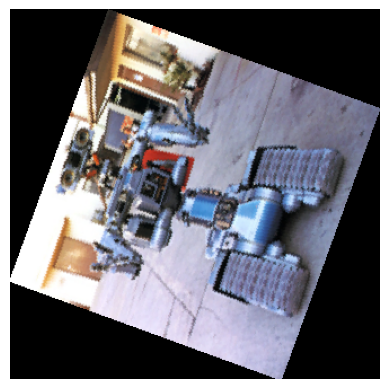

In [17]:
import matplotlib.pyplot as plt

# Load the image
image = plt.imread("cv03_robot.bmp")

# Rotate the image by 45 degrees
rotated_image = rotate_image(image, -70)

# Display the rotated image
plt.imshow(rotated_image)
plt.axis('off')
plt.show()
